In [115]:
%load_ext autoreload
%autoreload 2
import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import BPV
import pattern_manipulation as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
data = BPV.Data()
data.read_csv("p.delviva.csv",False)
data.df.sort_index(by="p",inplace=True,ascending=False)
data.df.set_index(pd.Index([j for j in range(len(data.df))]), inplace=True)
N=50
W=0.0025
data.df

,pattern-string,pattern-matrix,p,plog1onp
0,1,"[[0, 0, 0], [0, 0, 0], [0, 0, 1]]",0.661722,0.273231
1,1000000000,"[[1, 0, 0], [0, 0, 0], [0, 0, 0]]",0.204690,0.324691
2,101,"[[0, 0, 0], [0, 0, 0], [1, 0, 1]]",0.004366,0.023726
3,1000001,"[[0, 0, 1], [0, 0, 0], [0, 0, 1]]",0.004213,0.023044
4,10,"[[0, 0, 0], [0, 0, 0], [0, 1, 0]]",0.003695,0.020693
5,100000001,"[[1, 0, 0], [0, 0, 0], [0, 0, 1]]",0.003619,0.020343
6,111000000,"[[1, 1, 1], [0, 0, 0], [0, 0, 0]]",0.003260,0.018668
7,1000,"[[0, 0, 0], [0, 0, 1], [0, 0, 0]]",0.003185,0.018310
8,111000001,"[[1, 1, 1], [0, 0, 0], [0, 0, 1]]",0.003161,0.018196
9,111111100,"[[1, 1, 1], [1, 1, 1], [1, 0, 0]]",0.003140,0.018099


In [85]:
prbl_exact = BPV.BPV("pulp",data,N,W,time_solver=False)
prbl_exact.solve()
prbl_exact.pprint_solution()


Solver =  pulp 
Entropy =  0.024723470758200212 
Cardinality =  50 
Rate =  0.00250002779774


In [86]:
prbl_approx = BPV.BPV("euristic",data,N,W,time_solver=False)
prbl_approx.solve()
prbl_approx.pprint_solution()


Solver =  euristic 
Entropy =  0.0237049666428 
Cardinality =  40 
Rate =  0.002444937728


In [87]:
#union
pulp_indexes = data.df[data.df['pulp'] == True].index
pulp_minindex = min(pulp_indexes)
pulp_maxindex = max(pulp_indexes)
euristic_indexes = data.df[data.df['euristic'] == True].index
euristic_minindex = min(euristic_indexes)
euristic_maxindex = max(euristic_indexes)
minidx = min(pulp_minindex,euristic_minindex)
maxidx = max(pulp_maxindex,euristic_maxindex)
union = data.df.ix[minidx:maxidx]
union

,pattern-string,pattern-matrix,p,plog1onp,pulp,euristic
243,111001101,"[[1, 1, 1], [0, 0, 1], [1, 0, 1]]",0.000071,0.000681,False,True
244,100110,"[[0, 0, 0], [1, 0, 0], [1, 1, 0]]",0.000071,0.000678,False,True
245,1101000,"[[0, 0, 1], [1, 0, 1], [0, 0, 0]]",0.000071,0.000676,False,True
246,1000100,"[[0, 0, 1], [0, 0, 0], [1, 0, 0]]",0.000070,0.000672,False,True
247,100001100,"[[1, 0, 0], [0, 0, 1], [1, 0, 0]]",0.000070,0.000670,False,True
248,11011110,"[[0, 1, 1], [0, 1, 1], [1, 1, 0]]",0.000070,0.000670,False,True
249,11001000,"[[0, 1, 1], [0, 0, 1], [0, 0, 0]]",0.000070,0.000670,False,True
250,111011011,"[[1, 1, 1], [0, 1, 1], [0, 1, 1]]",0.000068,0.000657,False,True
251,11001110,"[[0, 1, 1], [0, 0, 1], [1, 1, 0]]",0.000067,0.000648,False,True
252,101001001,"[[1, 0, 1], [0, 0, 1], [0, 0, 1]]",0.000067,0.000648,False,True


In [88]:
#symmetric difference
symdiffidx = pulp_indexes.sym_diff(euristic_indexes)
symdiff = data.df.ix[symdiffidx]
symdiff

,pattern-string,pattern-matrix,p,plog1onp,pulp,euristic
243,111001101,"[[1, 1, 1], [0, 0, 1], [1, 0, 1]]",0.000071,0.000681,False,True
244,100110,"[[0, 0, 0], [1, 0, 0], [1, 1, 0]]",0.000071,0.000678,False,True
245,1101000,"[[0, 0, 1], [1, 0, 1], [0, 0, 0]]",0.000071,0.000676,False,True
246,1000100,"[[0, 0, 1], [0, 0, 0], [1, 0, 0]]",0.000070,0.000672,False,True
247,100001100,"[[1, 0, 0], [0, 0, 1], [1, 0, 0]]",0.000070,0.000670,False,True
248,11011110,"[[0, 1, 1], [0, 1, 1], [1, 1, 0]]",0.000070,0.000670,False,True
249,11001000,"[[0, 1, 1], [0, 0, 1], [0, 0, 0]]",0.000070,0.000670,False,True
250,111011011,"[[1, 1, 1], [0, 1, 1], [0, 1, 1]]",0.000068,0.000657,False,True
251,11001110,"[[0, 1, 1], [0, 0, 1], [1, 1, 0]]",0.000067,0.000648,False,True
252,101001001,"[[1, 0, 1], [0, 0, 1], [0, 0, 1]]",0.000067,0.000648,False,True


In [98]:
#euristic - pulp
euristic_minus_pulp = symdiff[symdiff['euristic'] == True]
euristic_minus_pulp

,pattern-string,pattern-matrix,p,plog1onp,pulp,euristic
243,111001101,"[[1, 1, 1], [0, 0, 1], [1, 0, 1]]",0.000071,0.000681,False,True
244,100110,"[[0, 0, 0], [1, 0, 0], [1, 1, 0]]",0.000071,0.000678,False,True
245,1101000,"[[0, 0, 1], [1, 0, 1], [0, 0, 0]]",0.000071,0.000676,False,True
246,1000100,"[[0, 0, 1], [0, 0, 0], [1, 0, 0]]",0.000070,0.000672,False,True
247,100001100,"[[1, 0, 0], [0, 0, 1], [1, 0, 0]]",0.000070,0.000670,False,True
248,11011110,"[[0, 1, 1], [0, 1, 1], [1, 1, 0]]",0.000070,0.000670,False,True
249,11001000,"[[0, 1, 1], [0, 0, 1], [0, 0, 0]]",0.000070,0.000670,False,True
250,111011011,"[[1, 1, 1], [0, 1, 1], [0, 1, 1]]",0.000068,0.000657,False,True
251,11001110,"[[0, 1, 1], [0, 0, 1], [1, 1, 0]]",0.000067,0.000648,False,True
252,101001001,"[[1, 0, 1], [0, 0, 1], [0, 0, 1]]",0.000067,0.000648,False,True


In [99]:
#pulp - euristic
pulp_minus_euristic = symdiff[symdiff['pulp'] == True]
pulp_minus_euristic


,pattern-string,pattern-matrix,p,plog1onp,pulp,euristic
283,101010000,"[[1, 0, 1], [0, 1, 0], [0, 0, 0]]",0.000047,0.000468,True,False
284,100011100,"[[1, 0, 0], [0, 1, 1], [1, 0, 0]]",0.000047,0.000466,True,False
285,1001111,"[[0, 0, 1], [0, 0, 1], [1, 1, 1]]",0.000047,0.000466,True,False
286,10010101,"[[0, 1, 0], [0, 1, 0], [1, 0, 1]]",0.000046,0.000464,True,False
287,110110010,"[[1, 1, 0], [1, 1, 0], [0, 1, 0]]",0.000046,0.000459,True,False
288,11000111,"[[0, 1, 1], [0, 0, 0], [1, 1, 1]]",0.000046,0.000459,True,False
289,1101101,"[[0, 0, 1], [1, 0, 1], [1, 0, 1]]",0.000045,0.000455,True,False
290,111001110,"[[1, 1, 1], [0, 0, 1], [1, 1, 0]]",0.000045,0.000453,True,False
291,100101010,"[[1, 0, 0], [1, 0, 1], [0, 1, 0]]",0.000044,0.000446,True,False
292,11011,"[[0, 0, 0], [0, 1, 1], [0, 1, 1]]",0.000043,0.000437,True,False


In [103]:
print(len(euristic_minus_pulp),len(pulp_minus_euristic))

14 24


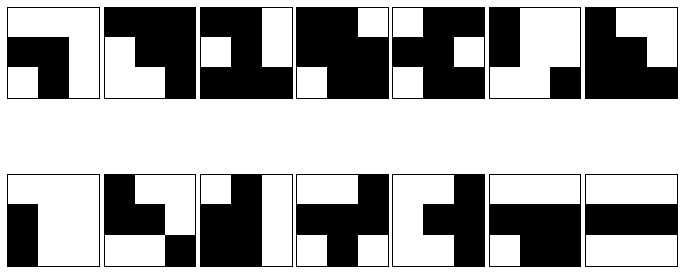

In [116]:
fig, axes = plt.subplots(2,7,figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0, wspace=0.05)
for ax, matrix in zip(axes.flat,euristic_minus_pulp['pattern-matrix']):
    ax.imshow(matrix,cmap=plt.cm.gray,interpolation='nearest')
plt.show()

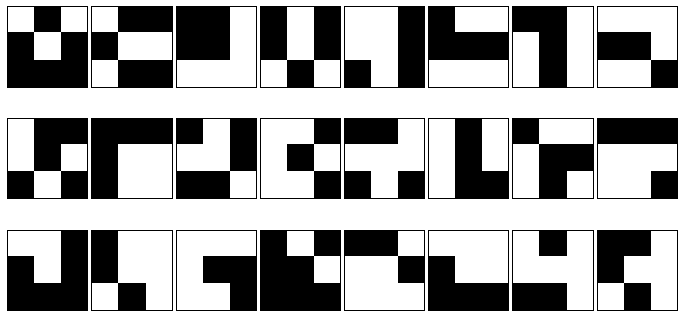

In [117]:
fig, axes = plt.subplots(3,8,figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0, wspace=0.05)
for ax, matrix in zip(axes.flat,pulp_minus_euristic['pattern-matrix']):
    ax.imshow(matrix,cmap=plt.cm.gray,interpolation='nearest')
plt.show()